# Classification in ML

Classification is an area of supervised machine learning that tries to predict which class or category some entity belongs to, based on its features

there are two types of supervised learning: Classification and Regression. 

1. In classification, 
    * the data that we have on the outcome is discrete: there are two or more options for what the value (or quality) of the outcome can take. 
    * Below, we can see illustrated what the values of our outcome look like in the two cases, and what we are trying to achieve with each. 
    * In classification, our value has only two options, and therefore we are trying to find the boundary between the two classes. 
    

2. In regression, 
    * we are trying to find the line (not necessarily linear!) that best follows the formation of our data. 

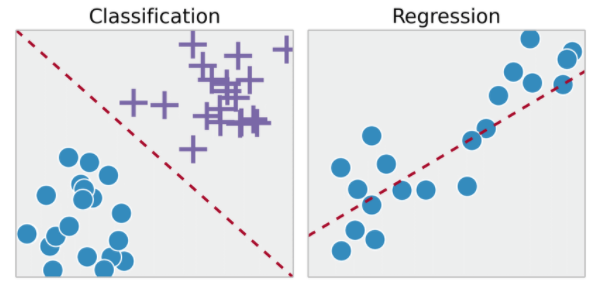

One good way to determine if you are in a case of classification is to ask: 

* Are there only a few (or 2) options the value that my outcome can be? 

    * If yes, you are in a classification situation. 
    * If your outcome is continuous, or could be any value in a range, you are in a situation that requires regression. 

We know that classification problems can be between two options:
 - (is this tumor cancerous or not? these are binary problems) or
 - multi-class problems (what type of animal is this?). <br>
 
As we discuss classification algorithms, we will explore algorithms that are capable of managing both **binary** and **multi-class** problems.

Algorithms are defined as a specific set of instructions for solving a problem or executing some procedure. <br>

In machine learning, the algorithms we use to learn from data take the form of mathematical functions. <br>
In training, these functions adjust their parameters based on the data they are shown. <br>
They then are able to make predictions about the outcome of new data with the parameters they learned during training.<br>
Here, we are going to discuss some of the most popular algorithms used in classification, and the mathematical processes that define them. 

## Logistic Regression

### Why not linear regression?

- 1st reason: Imagine you are trying to predict medical condition on a multilabel setup:

\begin{equation}
  Y =
    \begin{cases}
      0 & \text{if pneumonia}  \\
      1 & \text{if respiratory disease}\\
      2 & \text{if covid}
    \end{cases}       
\end{equation}

Using this coding implies an orderring on the outcomes. <br>
Not only that, it implies that the distance between `pneumonia` to `respiratory disease` is the same as from `respiratory disease` to `covid`. <br>
Also, changing the order would reasonably affect the linear regression obtained.

## For binary cases, then?

\begin{equation}
  Y =
    \begin{cases}
      0 & \text{if not pneumonia}  \\
      1 & \text{if pneumonia}
    \end{cases}       
\end{equation}

Logistic regression is one of the most popular and widely used algorithms for classification problems. As it is also relatively not complex and easy to implement, it is often used as a starting-point model, though it can also produce very high performance results used in production.<br>

Here, we are going to discuss the **`Binomial Logistic Regression`**, which is used for **`binary outcomes`**.<br>
Multinomial Logistic Regression does exist and can be used for multi-class classification problems, but is used less frequently. We will not cover it in this lesson. 

Logistic regression is actually a transformed linear regression function. We can see in the image below that if we attempted to fit a linear regression to a data with a binary outcome we would fit a line that did not predict very well for any values not at the extreme values: in the middle there is a lot of area where the line is very far away from the points. To move our function closer to the data, we need to transform the function we are using. In this case, it is helpful to use a sigmoid function, which estimates an "S" shape. Now we can see that our line fits our data much better. 

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

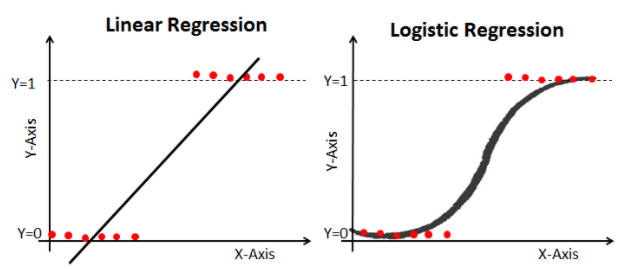

In the case that we have only two outcomes, our line actually represents the likelihood that a particular outcome will occur based on the features that the regression has been provided. Logistic regression returns this likelihood, which is then rounded to either 0 or 1 (each of the two classes) based on a cutoff (usually 0.5). 

Like Linear Regression, logistic regression makes a few assumptions about the properties of our data. These include that there are not any outliers in our data, and that there are no two variables in the dataset that are highly correlated to each other (any variable can, of course, be highly correlated to the outcome). These assumptions are why it is so important that we look for outliers and correlations! Depending on the results of our tests during the data exploration phase of our project, we might not be able to apply a logistic regression, or have to transform our data before doing so. 

# default.csv- example dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset:
- Unnamed:0 column
- Creating a new binary column

In [2]:
df = pd.read_csv('./data/Default.csv', index_col=0)
df

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879
...,...,...,...,...
9996,No,No,711.555020,52992.378914
9997,No,No,757.962918,19660.721768
9998,No,No,845.411989,58636.156984
9999,No,No,1569.009053,36669.112365


* Note : So, to make it more explicit to understand when we say **`index_col=0`**, it placed the first column as the index in the dataFrame rather appearing as **`Unnamed: 0`** .* Note : So, to make it more explicit to understand when we say **`index_col=0`**, it placed the first column as the index in the dataFrame rather appearing as **`Unnamed: 0`** .

In [3]:
# Creating a column 'default_binary' with values (0 and 1)
df['default_binary'] = df.default.apply(lambda x : 1 if x == 'Yes' else 0)

In [4]:
df.head()

,default,student,balance,income,default_binary
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


In [5]:
# 

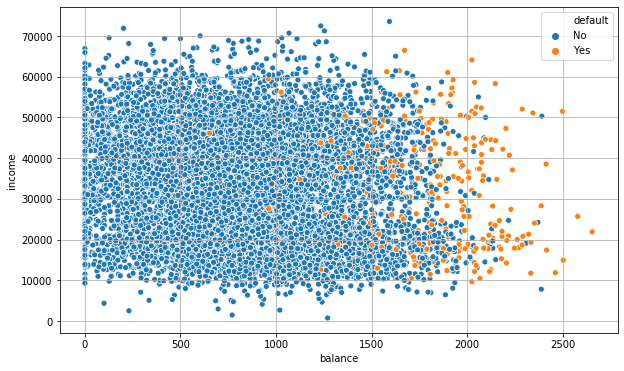

In [6]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='balance', y='income', data=df, hue='default', palette='tab10')
plt.grid()
plt.show()

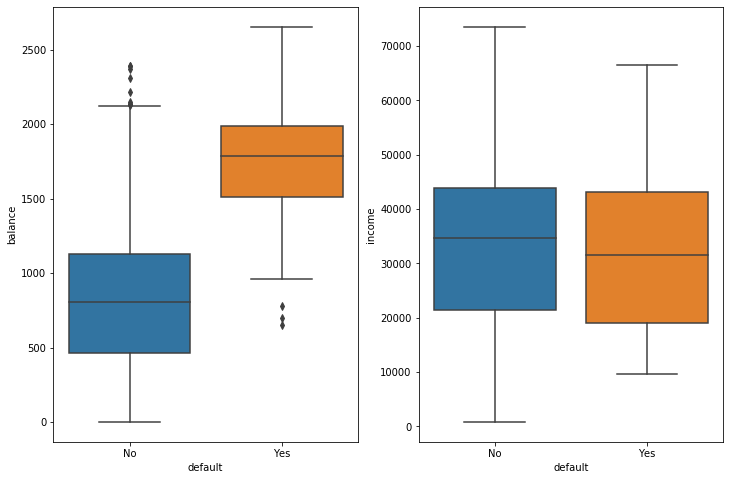

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

sns.boxplot(x='default', y='balance', data=df, ax=ax[0])
sns.boxplot(x='default', y='income', data=df, ax=ax[1])

plt.show()

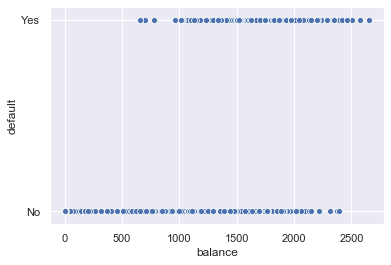

In [8]:
sns.set()
sns.scatterplot(x='balance',y='default', data=df);

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X=df[['balance']], y=df['default_binary'])
prediction = lr.predict(df[['balance']])

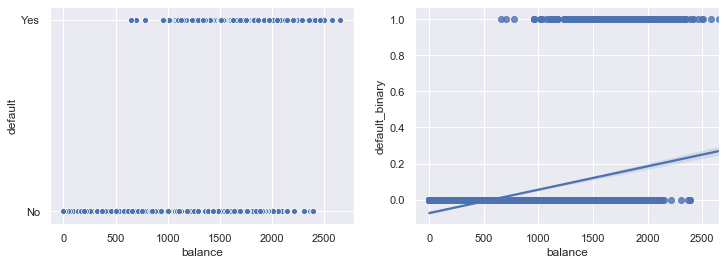

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(x='balance',y='default', data=df, ax=ax[0])

sns.regplot(x='balance',y='default_binary', data=df, ax=ax[1])
# sns.lineplot(x=df['balance'], y=prediction, ax=ax[1])

plt.show()

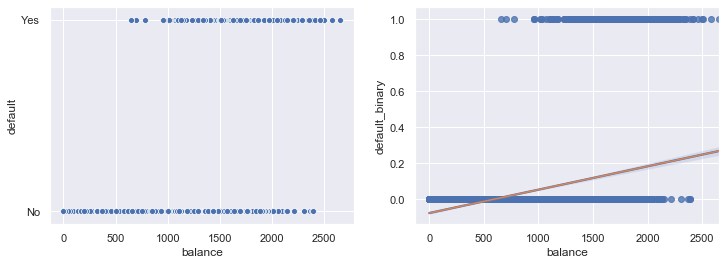

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(x='balance',y='default', data=df, ax=ax[0])

sns.regplot(x='balance',y='default_binary', data=df, ax=ax[1])
sns.lineplot(x=df['balance'], y=prediction, ax=ax[1])

plt.show()

- Predictions may be out of range.
- But yeah, the predictions will be ordered.
- Problem is - this approach cannot be extended to qualitative responses containing more than two levels.

# Logistic Regression

Rather than predicting the `target` directly, `logistic regression` tries to model the <b>`probability`</b> that your `target` belongs to a particular category.

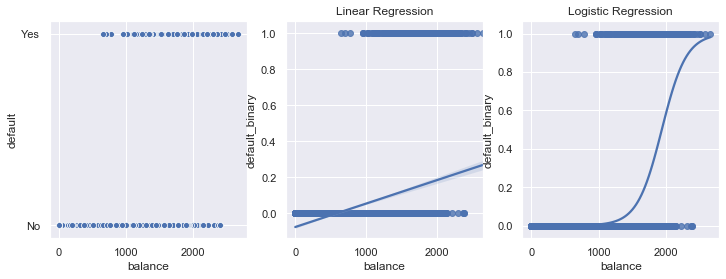

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.scatterplot(x='balance',y='default', data=df, ax=ax[0])

sns.regplot(x='balance',y='default_binary', data=df, ax=ax[1])
sns.regplot(x='balance',y='default_binary', data=df, logistic=True, ci=None, ax=ax[2])

ax[1].set_title('Linear Regression')
ax[2].set_title('Logistic Regression')

plt.show()

## S-shaped curve: Sigmoid Function
$$ \frac{e^{x}}{(1+e^{x})} $$ or $$ \frac{1}{(1+e^{-(x)})} $$

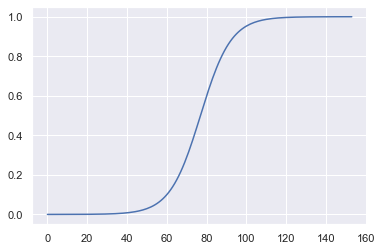

In [13]:
x = np.arange(-10,10,0.13)
plt.plot(np.exp(x)/(1+np.exp(x)));

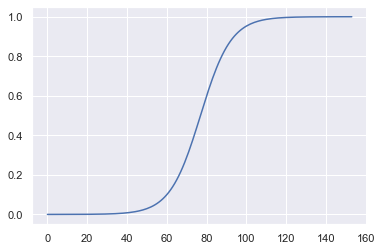

In [14]:
# or
plt.plot(1/(1+np.exp(-x)));

## Linear Regression

$$ y = P(default=Yes | balance) = a_0 + a_1\cdot balance $$

## Logistic Regression

$$ P(default=Yes | balance) = \frac{e^{a_0 + a_1\cdot x}}{1 + e^{a_0 + a_1\cdot x}}$$



# In Python

In [15]:
df

,default,student,balance,income,default_binary
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0
...,...,...,...,...,...
9996,No,No,711.555020,52992.378914,0
9997,No,No,757.962918,19660.721768,0
9998,No,No,845.411989,58636.156984,0
9999,No,No,1569.009053,36669.112365,0


In [16]:
X= df[['balance']]
y= df['default_binary']

In [17]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
predictions = logistic.predict(X)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
logistic.score(X,y)

0.9725

In [20]:
list(zip(predictions, df['default_binary']))

[(0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 

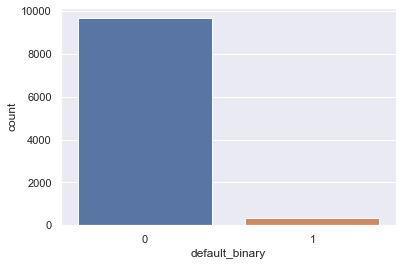

In [21]:
sns.countplot(df['default_binary']);

In [22]:
df.default_binary.value_counts()

0    9667
1     333
Name: default_binary, dtype: int64

In [23]:
df.default_binary.value_counts(normalize=True)

0    0.9667
1    0.0333
Name: default_binary, dtype: float64

parameter
- normalize : bool, default False
    If True then the object returned will contain the relative
    frequencies of the unique values.

In [24]:
# a0
logistic.intercept_

array([-10.65132824])

In [25]:
# a1
logistic.coef_

array([[0.00549892]])

$$ P(default) = \frac{e^{a_0 + a_1\cdot x}}{1 + e^{a_0 + a_1\cdot x}}$$

## Odds - the chances

$$ \left(\frac{P(default)}{1 - P(default)}\right) = e^{a_0 + a_1\cdot x}$$

1 in 5 people is a fraudster.

P = 1/5 = 0.2

Odds = $\frac{0.2}{0.8} = 1/4 = 0.25$

Odds: $\frac{\text{favorable events}}{\text{unfavorable events}}$, Probability: $\frac{\text{favorable events}}{\text{total events}}$

## Log Odds

$$ log\left(\frac{P(default)}{1 - P(default)}\right) = a_0 + a_1x$$

Remember that for **Linear Regression**, the value $a_1$, the coefficient, can be understood as how much of our target change if we change 1 unit in `x`. That is, if we change 1 in `x`, our target changes by $a_1$

For **Logistic Regression**, though, increasing X by one unit affects the **log odds** in $a_1$. So, although increasing `x` indeed increases the probability P, the value it will increase depends on

# The Loss function of the Logistic Regression

What does the logistic regression tries to minimize? 

Intuitively, we want to assign more punishment when:<br>
- predicting 1 while the actual is 0 and <br>
- when predict 0 while the actual is 1.

\begin{equation}
  Cost(\hat{p}, y_{obs}) =
    \begin{cases}
      -log(\hat{p}) & \text{if } y_{obs} = 1  \\
      -log(1-\hat{p}) & \text{if } y_{obs} = 0\\
    \end{cases}       
\end{equation}

$$Cost(\hat{p}, y_{obs}) = -y_{obs} \cdot log(\hat{p}) - (1 - y_{obs})\cdot log(1-\hat{p})$$

- $\hat{p}$ is my estimated probability, and 
- $y_{obs}$ is the label of my observation.<br>
<br>
<br>
<br>




So let's understand what this `cost function` represents:
- Imagine I have an observation whose true default label is 0 ($y_{obs}$ = 0) and <br>
- my model predicts that the probability of its value being 1 (default) is 80%. <br>

We would have:
    
- $cost(0.8, 0) = -0 \cdot log(0.8) - 1 \cdot log(1-0.8) = -log(0.2) \approx 1.6$ <br>


Now if we say that the probability of it being 1 is 90%:
- $cost(0.9, 0) = -0 \cdot log(0.9) - 1 \cdot log(1-0.9) = -log(0.1) \approx 2.3$

Now if we say that the probability of it being 1 is 95%:
- $cost(0.95, 0) = -0 \cdot log(0.95) - 1 \cdot log(1-0.95) = -log(0.05) \approx 3$





In [26]:
-np.log(0.99)

0.01005033585350145

custo é muito baixo

In [51]:
-np.log(0.01)

4.605170185988091

custo é muito alto

In [52]:
-np.log(1-0.9)

2.302585092994046

Text(0.5, 0, 'Probability of y = 1')

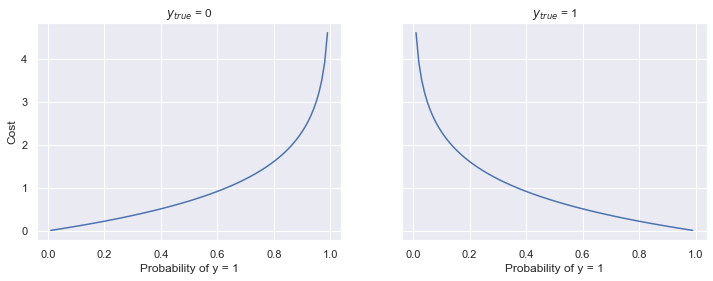

In [27]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12,4))

y_obs = 0
p = np.arange(0.01, 1, 0.01)
cost = -y_obs * np.log(p) - (1-y_obs) * np.log(1-p)
ax[0].plot(p, cost)

y_obs = 1
p = np.arange(0.01, 1, 0.01)
cost = -y_obs * np.log(p) - (1-y_obs) * np.log(1-p)
ax[1].plot(p, cost)


ax[0].set_title('$y_{true}$ = 0')
ax[1].set_title('$y_{true}$ = 1')

ax[0].set_ylabel('Cost')

ax[0].set_xlabel('Probability of y = 1')
ax[1].set_xlabel('Probability of y = 1')

Thus, it penalizes when you are sure it is one, but you are wrong. Or it penalizes when you are sure it is zero, but you are wrong, the true label is one.

So this is what logistic regression tries to minimize. Two important summaries:

- The results of the logistic regression are <b>probabilities</b> of being the label 1.
- As it minimizes that cost function, <b>you can be very confident of observations predicted with probabilities close to 1 or close to 0</b>. They will probably not be wrong because your model tried to avoid it during training.

# In Python

In Python, as soon as you `.fit()` your logistic regression, you'll be able to run the `.predict_proba()` method.

In [28]:
logistic.predict(df[['balance']])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
logistic.predict_proba(df[['balance']]) ## [0] - 0 , [1] - 1

array([[9.98694319e-01, 1.30568146e-03],
       [9.97887402e-01, 2.11259754e-03],
       [9.91405252e-01, 8.59474814e-03],
       ...,
       [9.97533484e-01, 2.46651596e-03],
       [8.83240365e-01, 1.16759635e-01],
       [9.99928552e-01, 7.14476480e-05]])

> This will display the probabilities of being 0 (the first column of the result) and the probabilities of being 1 (the second column of the result).

In [30]:
# The probabilities of being 0
logistic.predict_proba(df[['balance']])[:,0]

array([0.99869432, 0.9978874 , 0.99140525, ..., 0.99753348, 0.88324037,
       0.99992855])

In [31]:
# the probabilities of being 1
logistic.predict_proba(df[['balance']])[:,1]

array([1.30568146e-03, 2.11259754e-03, 8.59474814e-03, ...,
       2.46651596e-03, 1.16759635e-01, 7.14476480e-05])

In [32]:
pd.DataFrame(logistic.predict_proba(df[['balance']]))

,0,1
0,0.998694,0.001306
1,0.997887,0.002113
2,0.991405,0.008595
3,0.999566,0.000434
4,0.998223,0.001777
...,...,...
9995,0.998817,0.001183
9996,0.998474,0.001526
9997,0.997533,0.002467
9998,0.883240,0.116760


# mlxtend.plotting

Mlxtend (machine learning extensions) is a Python library of useful tools for the day-to-day data science tasks.<br>
http://rasbt.github.io/mlxtend/

In [34]:
# !pip install --upgrade mlxtend

In [35]:
from mlxtend.plotting import plot_decision_regions

* X, y should be **`nd.array`** format for **plot_decision_regions**
* clf ='logistic' $\rightarrow$ logistic = LogisticRegression()

Text(0.5, 0, 'balance')

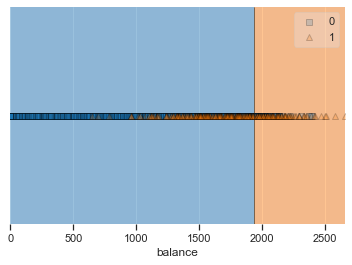

In [65]:
# Plot decision regions of a classifier(separa +- 50 % de Probabilidade)

plot_decision_regions(X=np.array(df[['balance']]),
                      y=np.array(df['default_binary']),
                      clf=logistic,
                      scatter_kwargs={'alpha':0.2});

plt.xlabel('balance')

In [55]:
logistic.predict_proba(pd.DataFrame([2000], columns=['balance']))

array([[0.41423073, 0.58576927]])

probabilidade de ser 0: 41,4% / probabilidade de ser 1: 58.6 %

In [37]:
logistic.coef_

array([[0.00549892]])

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/#:~:text=Introduction,the%20regression%20coefficients%20somewhat%20tricky.

# Another Example - More than 1 dimension (make_moon sample)

In [38]:
from sklearn.datasets import make_moons

In [39]:
X, y = make_moons(n_samples=1000, noise=0.4)

In [56]:
X # 2-Dimension

array([[-1.12518739,  0.14157676],
       [-0.58295826,  1.05766686],
       [ 0.75026817, -0.44249564],
       ...,
       [ 1.15280808, -0.79441152],
       [ 0.94459821,  0.03787495],
       [ 1.27088299,  1.61153108]])

In [41]:
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,

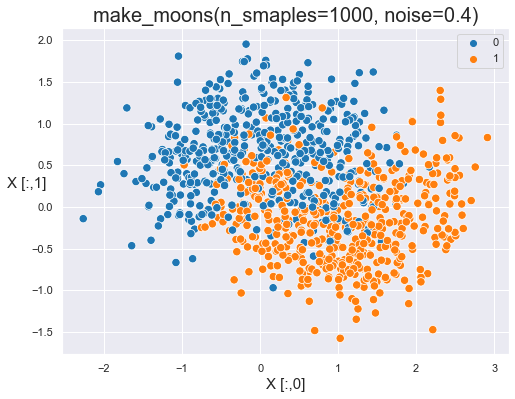

In [42]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, s=70, palette='tab10')

plt.xlabel('X [:,0]', fontsize=15)
plt.ylabel('X [:,1]', fontsize=15, rotation=0)

plt.title('make_moons(n_smaples=1000, noise=0.4)', fontsize=20)

plt.show()


In [43]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
logistic_regression.coef_ # (x, y)

array([[ 1.20427276, -2.59503083]])

x aumenta probabilidade de ser 1 aumenta / Y diminue probabilidade de ser 1 aumenta

In [45]:
logistic_regression.intercept_

array([0.0207921])

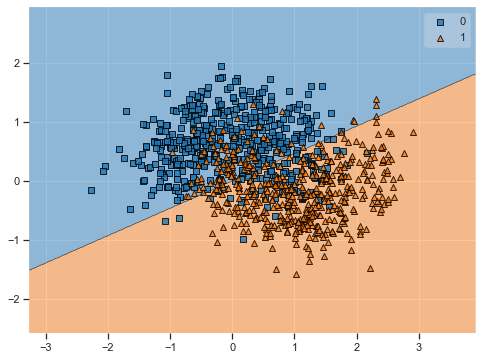

In [46]:
plt.figure(figsize=(8, 6))

plot_decision_regions(X, y, clf=logistic_regression);

In [47]:
logistic_regression.coef_[0]

array([ 1.20427276, -2.59503083])

In [48]:
logistic_regression.intercept_

array([0.0207921])

In [49]:
# https://stats.stackexchange.com/questions/246489/slope-and-intercept-of-the-decision-boundary-from-a-logistic-regression-model
slope = logistic_regression.coef_[0][0]/(-logistic_regression.coef_[0][1]) 
# -b1/b2 --> slope

intercept = logistic_regression.intercept_[0]/(-logistic_regression.coef_[0][1]) 
# b0/b2 --> intercept

https://stats.stackexchange.com/questions/246489/slope-and-intercept-of-the-decision-boundary-from-a-logistic-regression-model

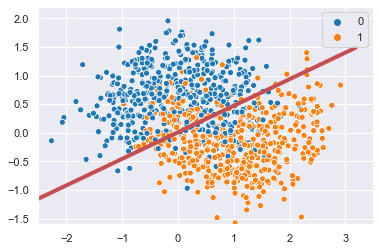

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

sns.scatterplot(X[:,0], X[:,1], hue=y, ax=ax1, palette='tab10')

x_min, x_max = ax1.get_xlim()
ax1.plot([x_min, x_max], [x_min*slope+intercept, x_max*slope+intercept], '-r', lw=4)
ax1.set_xlim([-2.5,3.5])
ax1.set_ylim([-1.6, 2.2])
plt.show()

In [60]:
X=df[['balance', 'income']]
y= df['default_binary']

model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
model.coef_

array([[5.64710797e-03, 2.08091984e-05]])

balance: 0.0056 / income: 0.00002 
- balance é mais importante do que income 

Text(0, 0.5, 'income')

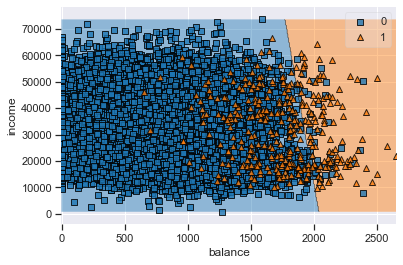

In [64]:
plot_decision_regions(np.array(X), np.array(y), clf=model)
plt.xlabel('balance')
plt.ylabel('income')